# Q-learning for policyII


In [1]:
import numpy as np
import random
from random import sample
import math 
import matplotlib.pyplot as plt

In [2]:
def reset():
    st= [0]*16
    return tuple(st)

In [3]:
weibull_scale=(2365.08,996.88,713.55,1406.84,343.76,3933.12,828.19,2040.95)
weibull_shape=(414.16,109.25,79.81,115.21,169.81,143.60,43.83,296.48)
tf=(2,6.5,2.5,6,5,3.5,3,3.5)
tp=(0.4,5.42,0.625,0.857,1.25,0.7,0.429,0.875)
time_interval=5
running_time=100000

In [4]:
def CountFrequency(my_list):
 
    # Creating an empty dictionary
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
 
    for key, value in freq.items():
        print ("% d : % d"%(key, value))
 

In [5]:
def env(action,st,i): 
    
    f = random.weibullvariate(weibull_scale[i],weibull_shape[i])
    
    if action == 0 :
        if f <= st[i]: # fail
            st[i]= 0 #new
            reward= -(time_interval / tp[i])*time_interval * math.ceil(tf[i]/time_interval)
            st[i+8]=0
        else:
            st[i] +=5
            reward = 5
            
    if action ==1 :
        
        st[i]=0
        st[i+8]=0
        reward = -(time_interval / tp[i])*tp[i]
            
           
    return (tuple(st) , reward)

In [6]:
num_episodes=1000
min_lr=0.1
discount=0.5
decay=25

In [7]:
def choose_action(epsilon, state,i):
    if (np.random.random() < epsilon):
        return random.choice([0,1]) 
    else:
        st = (state[i],state[i+8])
        return np.argmax(Q_table[st])
            

In [8]:
def get_learning_rate(t):
    
    """Gets value for learning rate. It declines as we advance in episodes."""
    # Learning rate also declines as we add more episodes
    return max(min_lr, min(1., 1. - math.log10((t + 1) / decay)))


# replacement time for tire

In [12]:
Q_table = np.zeros((100000 ,2) + (2,))

i = 0
scores = []
# Looping for each episode
for e in range(400):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate =get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state,i)
        # Take action
        obs,reward = env(action,list(current_state),i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+8])
        new_statei = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
    
    scores.append(sum(rewards))

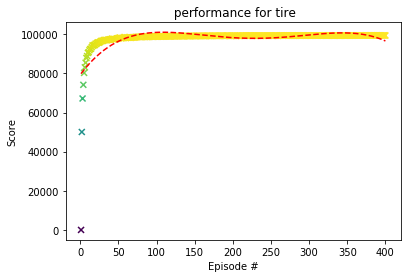

In [14]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for tire')
plt.show()
     

In [15]:
optimal =[]
current_state = reset()
i = 0

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env(action,list(current_state),i)
    current_state = obs
np.unique(optimal)

array([2315])

# optimal replacement time for transmission

In [15]:
Q_table = np.zeros((100000 ,2) + (2,))

i = 1
scores = []
# Looping for each episode
for e in range(400):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate =get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state,i)
        # Take action
        obs,reward = env(action,list(current_state),i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+8])
        new_statei = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
    
    scores.append(sum(rewards))


In [18]:
optimal =[]
current_state = reset()
i = 1

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env (action,list(current_state),i)
    current_state = obs
np.unique(optimal)

array([975])

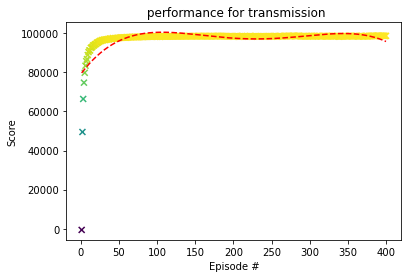

In [17]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for transmission')
plt.show()
     

# optimal replacement time for wheel rim

In [18]:
Q_table = np.zeros((100000 ,2) + (2,))

i = 2
scores = []
# Looping for each episode
for e in range(200):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state,i)
        # Take action
        obs,reward = env (action,list(current_state),i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+8])
        new_statei = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
    
    scores.append(sum(rewards))

In [20]:
optimal =[]
current_state = reset()
i = 2

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env (action,list(current_state),i)
    current_state = obs
np.unique(optimal)

array([660])

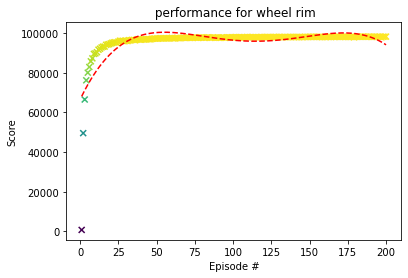

In [19]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for wheel rim')
plt.show()
     

# optimal replacement time for coupling

In [21]:
Q_table = np.zeros((100000 ,2) + (2,))

i = 3
scores = []
# Looping for each episode
for e in range(200):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state,i)
        # Take action
        obs,reward = env (action,list(current_state),i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+8])
        new_statei = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
    
    scores.append(sum(rewards))

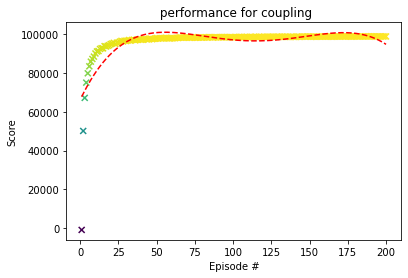

In [22]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for coupling')
plt.show()
     

In [23]:
optimal =[]
current_state = reset()
i = 3

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env (action,list(current_state),i)
    current_state = obs
np.unique(optimal)

array([1315])

# optimal replacement time for motor

In [24]:
Q_table = np.zeros((100000 ,2) + (2,))

i = 4
scores = []
# Looping for each episode
for e in range(200):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state,i)
        # Take action
        obs,reward = env (action,list(current_state),i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+8])
        new_statei = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
    
    scores.append(sum(rewards))

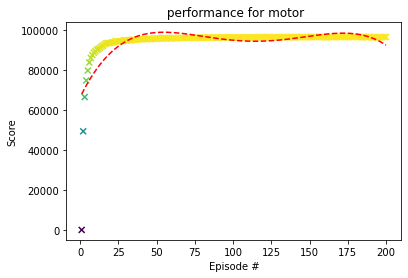

In [25]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for motor')
plt.show()
     

In [27]:
optimal =[]
current_state = reset()
i = 4

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env (action,list(current_state),i)
    current_state = obs
np.unique(optimal)

array([340])

# optimal replacement time for brake

In [28]:
Q_table = np.zeros((100000 ,2) + (2,))

i = 5
scores = []
# Looping for each episode
for e in range(400):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state,i)
        # Take action
        obs,reward = env (action,list(current_state),i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+8])
        new_statei = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
    
    scores.append(sum(rewards))

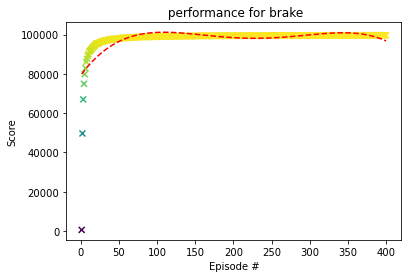

In [29]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for brake')
plt.show()
     

In [30]:
optimal =[]
current_state = reset()
i = 5

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env (action,list(current_state),i)
    current_state = obs
np.unique(optimal)

array([3745])

# optimal replacement time for steering wheel

In [32]:
Q_table = np.zeros((100000 ,2) + (2,))

i = 6
scores = []
# Looping for each episode
for e in range(200):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state,i)
        # Take action
        obs,reward = env (action,list(current_state),i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+8])
        new_statei = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
    
    scores.append(sum(rewards))

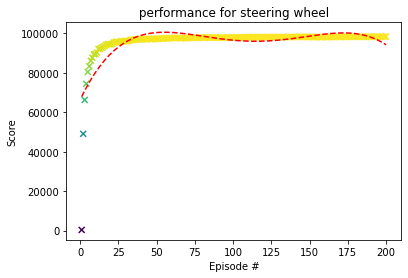

In [36]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for steering wheel ')
plt.show()
     

In [35]:
optimal =[]
current_state = reset()
i = 6

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env (action,list(current_state),i)
    current_state = obs
np.unique(optimal)
    

array([710])

# optimal replacement time for shifting gears

In [38]:
Q_table = np.zeros((100000 ,2) + (2,))

i = 7
scores = []
# Looping for each episode
for e in range(200):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
            
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state,i)
        # Take action
        obs,reward = env (action,list(current_state),i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+8])
        new_statei = (new_state[i],new_state[i+8])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
    
    scores.append(sum(rewards))

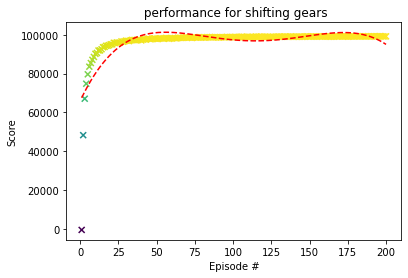

In [39]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for shifting gears')
plt.show()
     

In [40]:
optimal =[]
current_state = reset()
i = 7

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+8])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env (action,list(current_state),i)
    current_state = obs
np.unique(optimal)

array([1995])